In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
from statsmodels.tsa import arima_process

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

In [3]:
n = 600

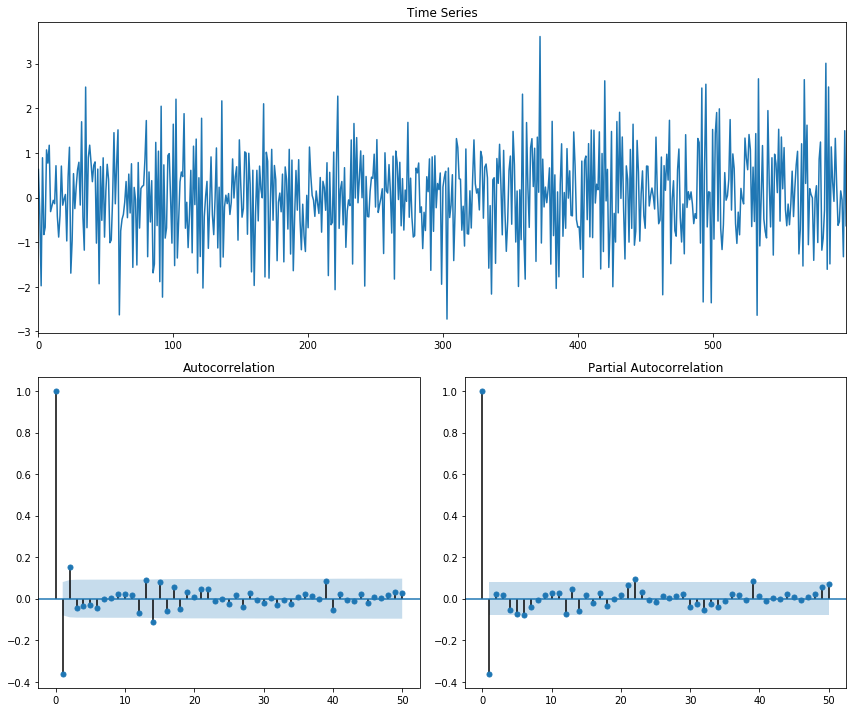

In [4]:
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1ma1_data )

Text(0.5,0,'Lag')

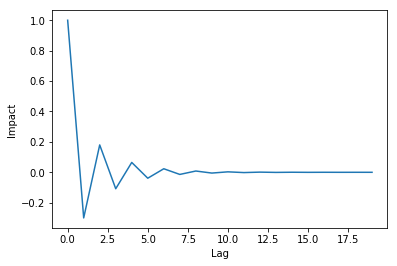

In [5]:
plt.plot(arima_process.arma_impulse_response(ar, ma, nobs=20))
plt.ylabel("Impact")
plt.xlabel("Lag")

In [6]:
ar1ma1 = smtsa.ARMA(ar1ma1_data.tolist(), order=(1, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -814.425
Method:                           mle   S.D. of innovations              0.940
Date:                Fri, 08 Dec 2017   AIC                           1634.851
Time:                        16:16:29   BIC                           1648.042
Sample:                             0   HQIC                          1639.986
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.4180      0.096     -4.364      0.000      -0.606      -0.230
ma.L1.y        0.0684      0.104      0.658      0.511      -0.135       0.272
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.3926           +0.0000j            2.3926            0.5000
MA.1          -14.6263           +0.0000j           14.6263            0.5000
-----------------------------------------------------------------------------
"""

In [7]:
aicVal=[]
for ari in range(1, 3):
    for maj in range(1,3):
        arma_obj = smtsa.ARMA(ar1ma1_data.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])